In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset


In [3]:
df=pd.read_csv("C:\\Users\sreev\Downloads\DoctorVisits.csv")
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [4]:
df.tail()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
5185,5186,0,female,0.22,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,0.27,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,0.37,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,0.52,0.65,0,0,0,no,no,no,no,no
5189,5190,0,male,0.72,0.25,0,0,0,no,no,yes,no,no


# Information of dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


# Find out the total no. of people based on their count of illness

In [6]:
df['illness'].value_counts()

1    1638
0    1554
2     946
3     542
4     274
5     236
Name: illness, dtype: int64

# Count of male and female

In [7]:
df['gender'].value_counts()

female    2702
male      2488
Name: gender, dtype: int64

# Plot for visits of no. of male and female 

<BarContainer object of 2 artists>

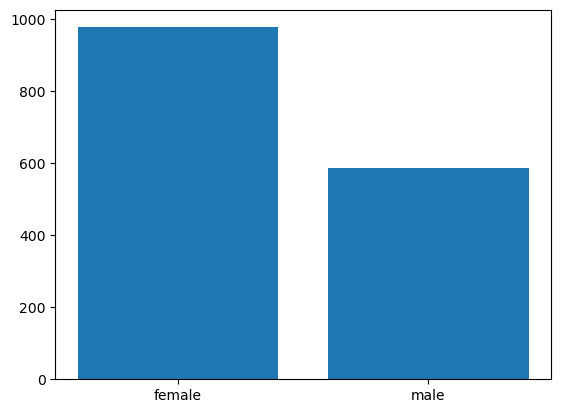

In [13]:
temp=df[['visits','gender','age']]
temp=temp.groupby(['gender'],as_index=False).sum()
plt.bar(temp['gender'],temp['visits'])

# Plot for visits of different ages groups

<BarContainer object of 12 artists>

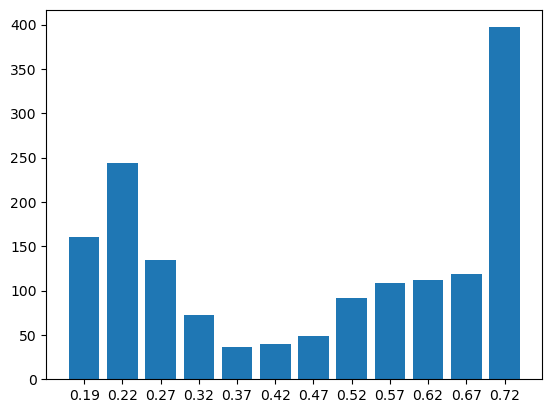

In [9]:
temp=df[['visits','age']]
temp=temp.groupby(['age'],as_index=False).sum()
temp['age']=temp['age'].map(str)
plt.bar(temp['age'],temp['visits'])

# Plot for No. of visits of male and female under each age group 

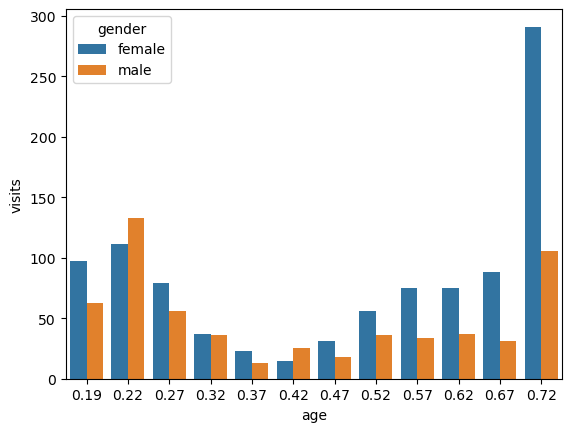

In [17]:
temp=df[['visits','age','gender']]
temp=temp.groupby(['age','gender'],as_index=False).sum()
temp['age']=temp['age'].map(str)
sns.barplot(data=temp,x='age',y='visits',hue='gender')
plt.show()

# Representing percentage of patient and age using pie-chart

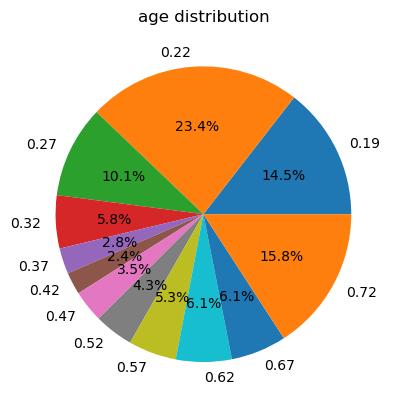

In [19]:
age_count=df['age'].value_counts()
age_count=age_count.sort_index()
plt.pie(age_count, labels=age_count.index, autopct='%1.1f%%')
plt.title('age distribution')
plt.show()

# Comparing no. of visits based on gender and illness

<Axes: xlabel='illness'>

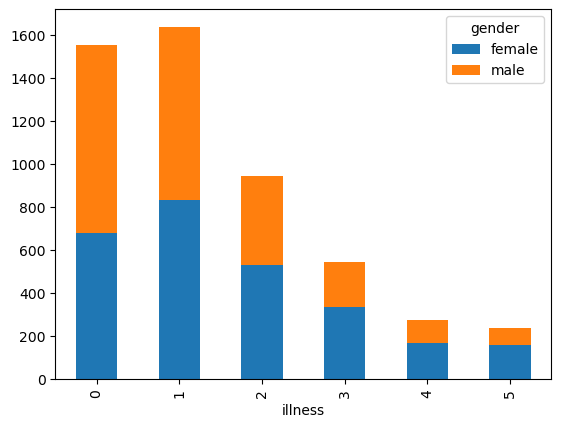

In [20]:
df.groupby('illness')['gender'].value_counts().unstack().plot(kind='bar', stacked=True)

# Finding the age of people who are more likely of getting illness 

In [21]:
res=dict(df['age'].value_counts())
max(res, key=lambda k: res[k])

0.22

# Creating lists for categories and their count

In [22]:
cat=[]
count=[]

# Count for number of visits which come under the category of private 

In [23]:
df['private'].replace(['no', 'yes'],[0, 1], inplace=True)
cou=df['private'].sum()
cat.append('private')
count.append(cou)
print("The number of visits which come under the category of the private are: ",cou)

The number of visits which come under the category of the private are:  2298


# Count for number of visits which come under the category of freepoor

In [24]:
df['freepoor'].replace(['no', 'yes'],[0, 1], inplace=True)
cou=df['freepoor'].sum()
cat.append('freepoor')
count.append(cou)
print("The number of visits which come under the category of the freepoor are: ",cou)

The number of visits which come under the category of the freepoor are:  222


# Count for number of visits which come under the category of freerepat

In [25]:
df['freerepat'].replace(['no', 'yes'],[0, 1], inplace=True)
cou=df['freerepat'].sum()
cat.append('freerepat')
count.append(cou)
print("The number of visits which come under the category of the freerepat are: ",cou)

The number of visits which come under the category of the freerepat are:  1091


# Count for number of visits which come under the category of nchronic

In [26]:
df['nchronic'].replace(['no', 'yes'],[0, 1], inplace=True)
cou=df['nchronic'].sum()
cat.append('nchronic')
count.append(cou)
print("The number of visits which come under the category of the nchronic are: ",cou)

The number of visits which come under the category of the nchronic are:  2092


# Count for number of visits which come under the category of lchronic

In [27]:
df['lchronic'].replace(['no', 'yes'],[0, 1], inplace=True)
cou=df['lchronic'].sum()
cat.append('lchronic')
count.append(cou)
print("The number of visits which come under the category of the lchronic are: ",cou)

The number of visits which come under the category of the lchronic are:  605


# Plot for visits for different categories 

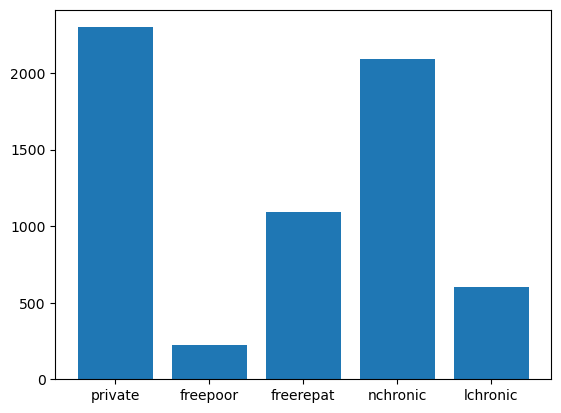

In [28]:
plt.bar(cat,count)
plt.show()

# Count of the no. of males and females affected by illness

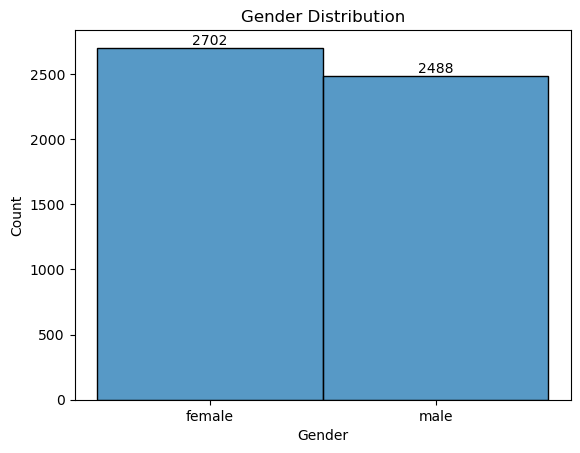

In [33]:
sns.histplot(df['gender'], bins=2)
gender_counts = df['gender'].value_counts()
for i, count in enumerate(gender_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')
plt.xlabel('Gender')
plt.title('Gender Distribution')
plt.show()